### Name: Mercy Akinkuotu
### Track :Data Science
### 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from numpy import exp

pd.set_option('display.max_rows', 1460)
pd.set_option('display.max_columns', 81)
pd.set_option('display.width', 1000)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

In [4]:
train_df = pd.read_csv('train.csv') 
test_df = pd.read_csv('test.csv')

In [5]:
train_df.shape

(891, 12)

In [6]:
test_df.shape

(418, 11)

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* The train has 12 features while test has 11 features, the difference in features is usually the target feature which in this case is **Survived**. But lets confirm

In [8]:
diff_feature = set(train_df.columns.values)-set(test_df.columns.values)
print(diff_feature)

{'Survived'}


*  Yesssss Our target feature is  'Survived'

*  Lets check for the datatypes in dataset provided both and compare both the test and train dataset

In [9]:
train_df.dtypes.value_counts()

object     5
int64      5
float64    2
dtype: int64

In [10]:
test_df.dtypes.value_counts()

object     5
int64      4
float64    2
dtype: int64

* They both the same datatypes but int64 for test has 4 features while train has 5,that means our train_df.dtypes.value_counts() feature is of type int64

#### Lets check for duplicate features

In [11]:
duplicatesdf = train_df[train_df.duplicated()]
print(duplicatesdf)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [12]:
test_duplicatesdf = test_df[test_df.duplicated()]
print(test_duplicatesdf)

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


* There are no duplicate features 

#### Lets check for missing or null values

In [13]:
train_df.isnull().values.any() 

True

In [14]:
test_df.isnull().values.any()

True

* There are missing values in both the train and test data

#### Lets check for the amount of Missing or null values

In [15]:
train_df.isnull().sum().sum() 

866

In [16]:
test_df.isnull().sum().sum() 

414

* train has 866 data points missing while test has 414

#### Lets Check if the missing points in all the features 

In [17]:
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [18]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

* The missing point is present in just the Age and Cabin for both train and test
* Embarked in train , Fare in test

#### Visualize the Missing data point

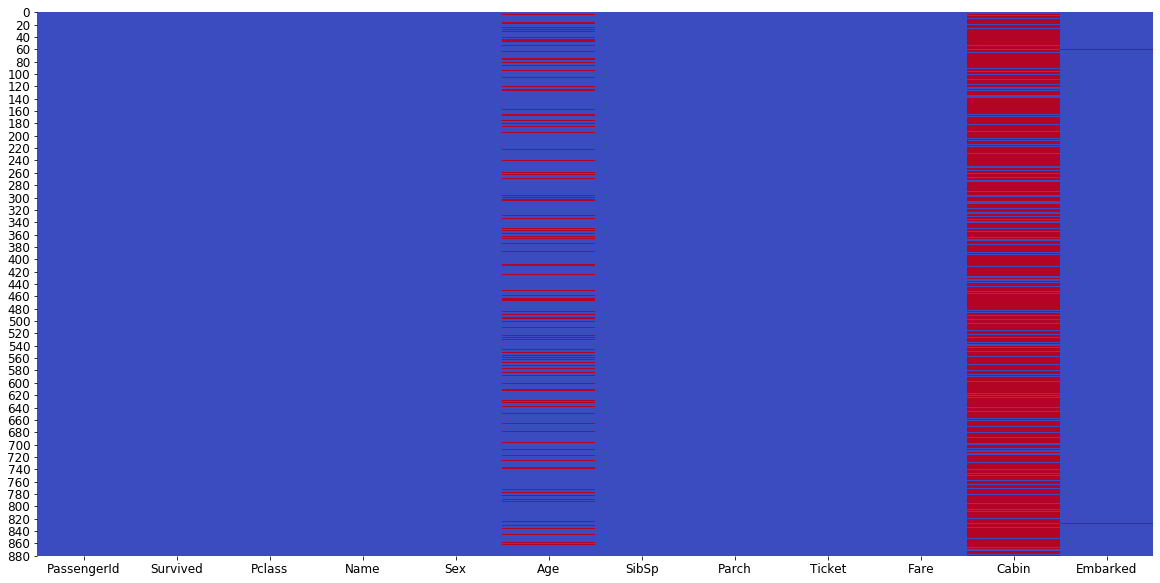

In [19]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_df.isnull(), cbar=False, cmap="coolwarm") #
plt.show()

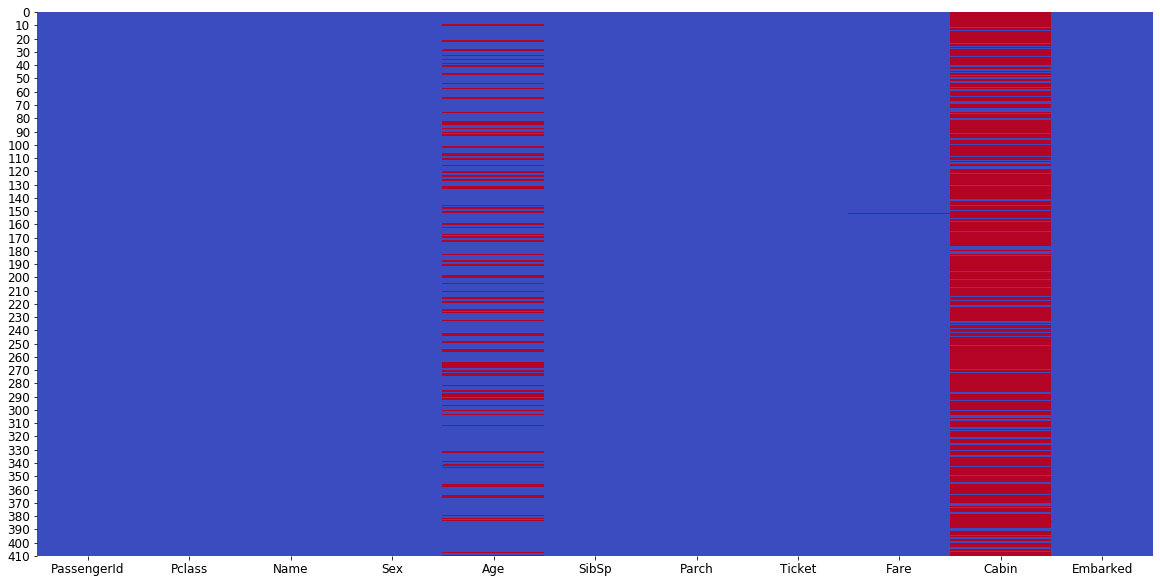

In [20]:
plt.figure(figsize=(20, 10))
sns.heatmap(test_df.isnull(), cbar=False, cmap="coolwarm") #
plt.show()

#### This counts the Null values in a column in the dataset

In [21]:
null_column=train_df.columns[train_df.isnull().any()] 
null_total = train_df[null_column].isnull().sum().sort_values(ascending=False) 
null_total

Cabin       687
Age         177
Embarked      2
dtype: int64

In [22]:
null_column_test=test_df.columns[test_df.isnull().any()] 
null_total_test = test_df[null_column_test].isnull().sum().sort_values(ascending=False) 
null_total_test

Cabin    327
Age       86
Fare       1
dtype: int64

Lets Take closer look at the Cabin.I  would not drop the feature but perform feature engineering on it to make it useful
* Check for the different cabin available

In [23]:
train_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [24]:
test_df.Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

* Train has more cabins than test.
* Instead of dropping the Feature I would group them according to the first letter of the cabin.

In [25]:
train_df["Cabin_group"] = train_df["Cabin"].str.slice(0,1)
test_df["Cabin_group"] = test_df["Cabin"].str.slice(0,1)

#### Data distribution

In [26]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


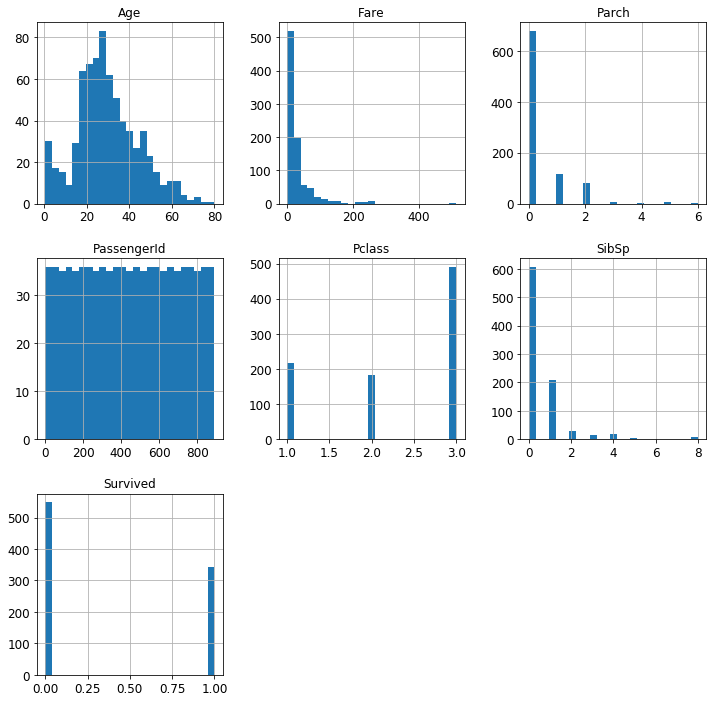

In [27]:
train_df.hist(figsize=(12,12), bins=25)
plt.show()

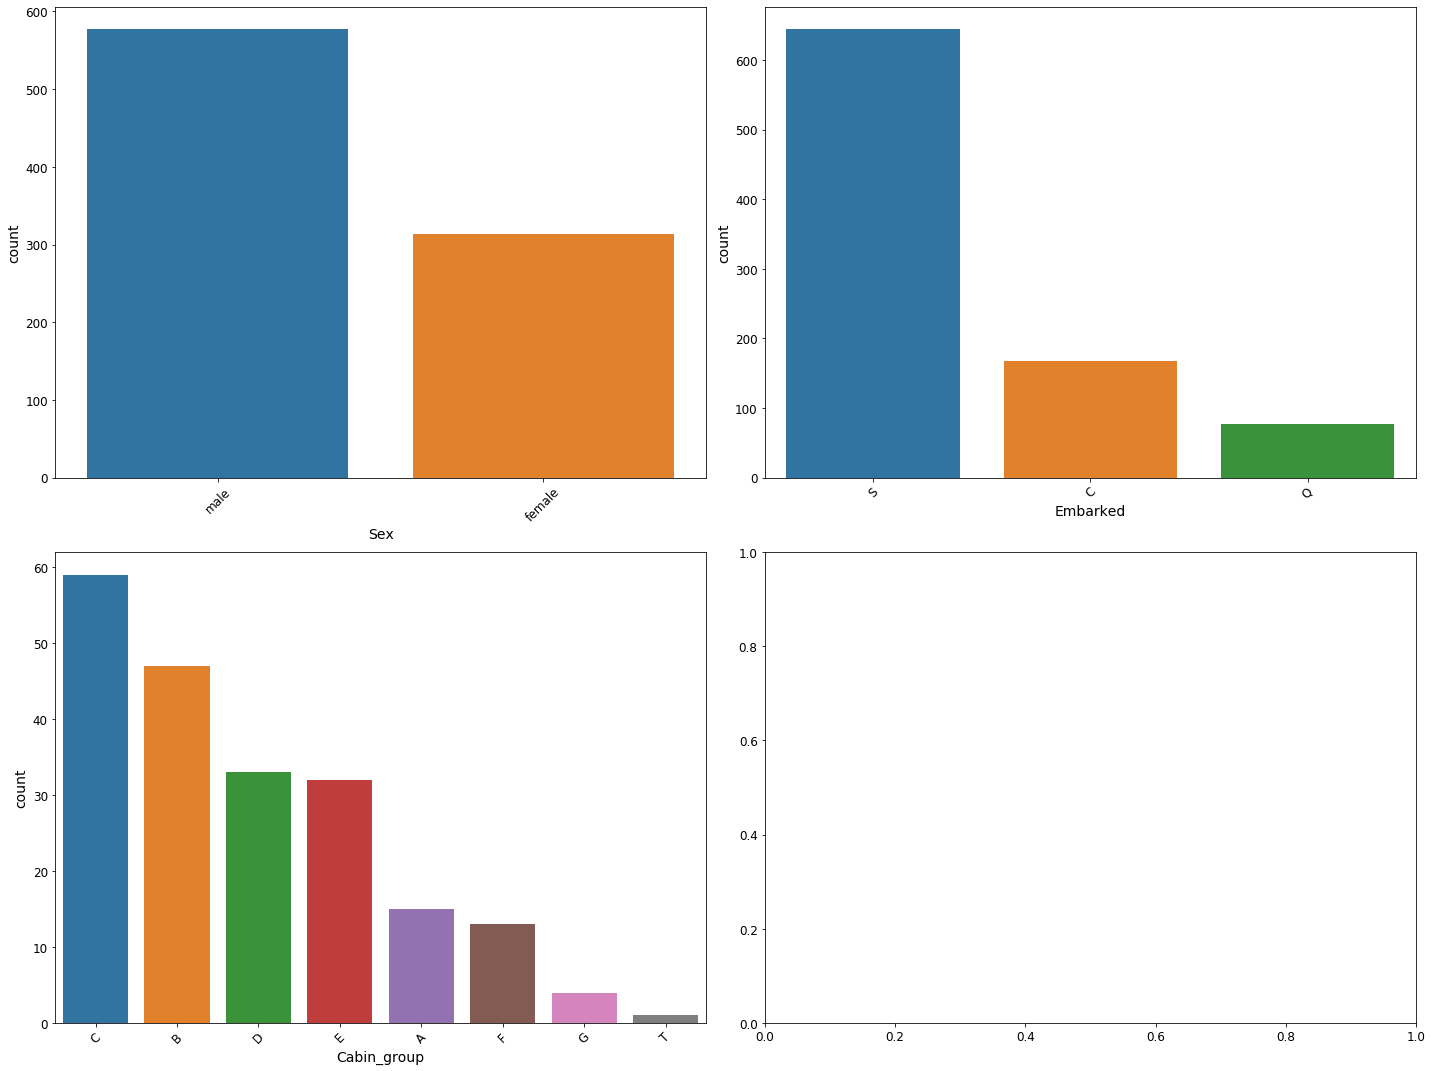

In [28]:
columns =['Sex','Embarked','Cabin_group']
fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(20, 15))
for i, ax in zip(columns, axes.flat):
    n =sns.countplot(train_df[i],order = train_df[i].value_counts().index,label=i,ax=ax)
    n.set_xticklabels(n.get_xticklabels(), rotation=45)
fig.tight_layout() 
plt.show()

#### From the distribution Above
* Majority of the Passengers are between the ages of 20 and 40
* Majority of the Passengers paid less than 200 for fare
* A very large percentage of the passengers are travelling alone i.e without parents,children,sibling,spouse
* The class with most passenger is class 3
* Around 40% 0f the total passenger survived
* There are more male aboard than female
* More passengeres embarked at Southampton 
* More people are in Cabin group C 

#### Correlation

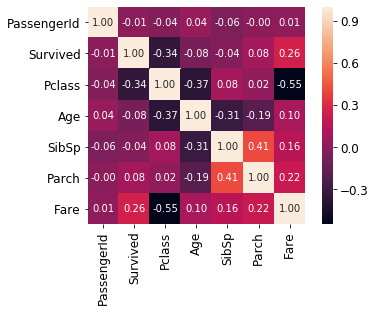

In [29]:
corr_mat= sns.heatmap(train_df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
corr_mat.set_ylim(7.0, 0)
plt.show()

#### There is a relationship between:
* Fare and Class:It could mean 1st class is more expensive than 3rd class.
* Parent and Children is related to Fare although the relationship is negative:It could mean Families with more children go for cheaper fare(i.e the higher the number of kids the cheaper the fare).
* Class and Parent and Children:This could mean families with chidren prefer to stay in the same class(Which is cheaper?).
* Siblings and spouse and Age
* Age and Class:Could mean older people can afford a more expensive class.

#### Lets investigate these relationships

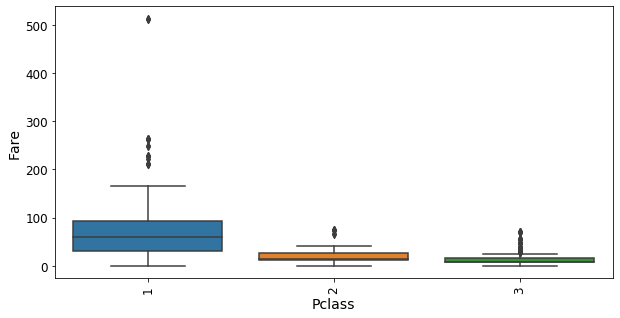

In [30]:
plt.figure(figsize=(10, 5))
n= sns.boxplot(x=train_df["Pclass"], y=train_df['Fare'])
n.set_xticklabels(n.get_xticklabels(), rotation=90)
plt.show()

* class 1 has highest fare Lets say First class
* class 2 medium fare lets say Business class
* class 3 has the cheapest fare lets say Economy class

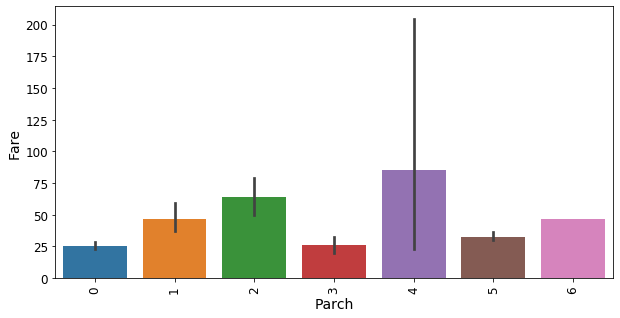

In [31]:
plt.figure(figsize=(10, 5))
n= sns.barplot(x=train_df["Parch"], y=train_df['Fare'])
n.set_xticklabels(n.get_xticklabels(), rotation=90)
plt.show()

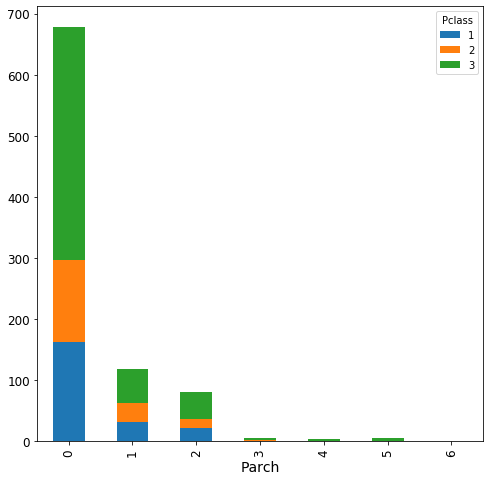

In [32]:
Area  = pd.crosstab(index=train_df['Parch'], 
                          columns=train_df["Pclass"])
Area.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
plt.show()

* This further validats that more people prefer to stay in class three.
* Class 1 was decrease with increase in the number of children
* Families with number of children greater than 2 prefers class 3 the most 
* We can stay the number of children is highest in class 3

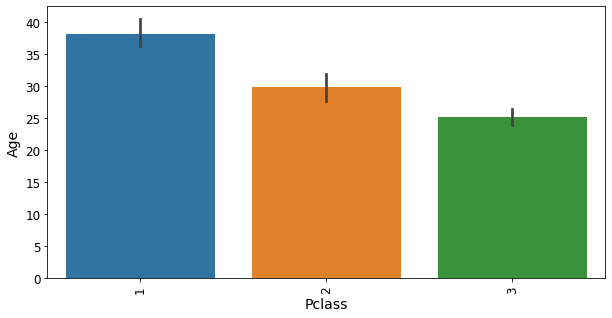

In [33]:
plt.figure(figsize=(10, 5))
n= sns.barplot(x=train_df["Pclass"], y=train_df['Age'])
n.set_xticklabels(n.get_xticklabels(), rotation=90)
plt.show()

* Older people prefers to Class 1 maybe because they can easily afford it

#### Analysis Of Survived

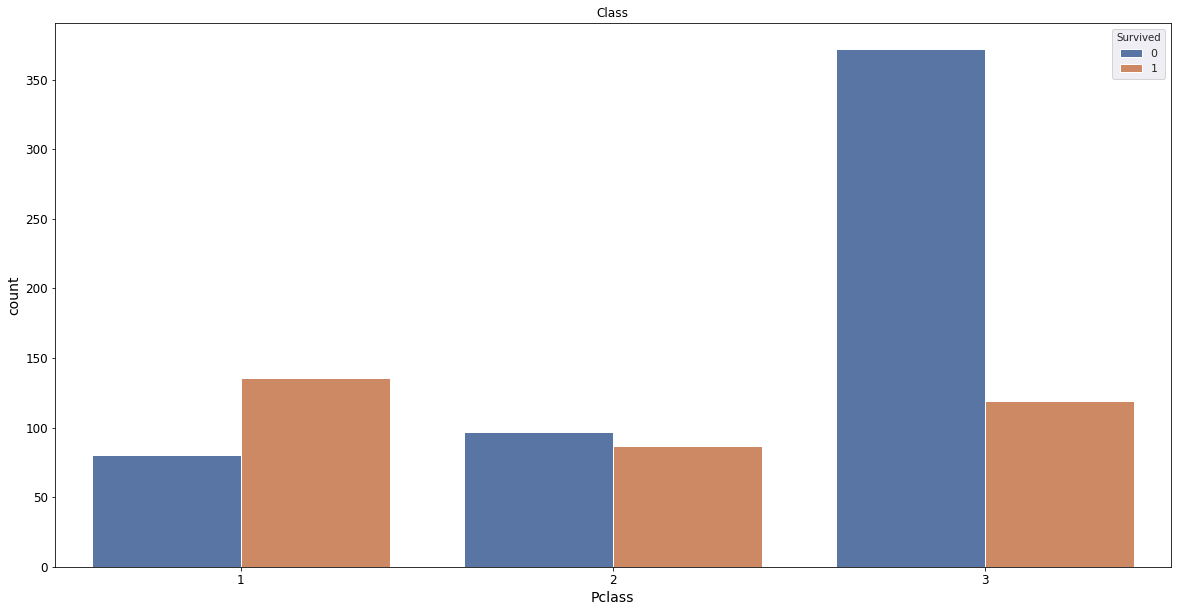

In [34]:
plt.figure(figsize=(20, 10))
plt.title('Class')
sns.set(style="darkgrid")
sns.countplot(x = 'Pclass', hue='Survived', data = train_df)
plt.show()

* The passengers that survived are more than those that die in Class 1,While in the other classes the passenger that died are more than who didn't

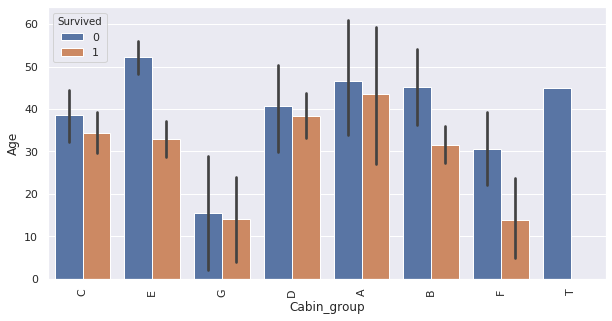

In [35]:
plt.figure(figsize=(10, 5))
n= sns.barplot(x="Cabin_group", y='Age',hue = 'Survived', data = train_df)
n.set_xticklabels(n.get_xticklabels(), rotation=90)
plt.show()

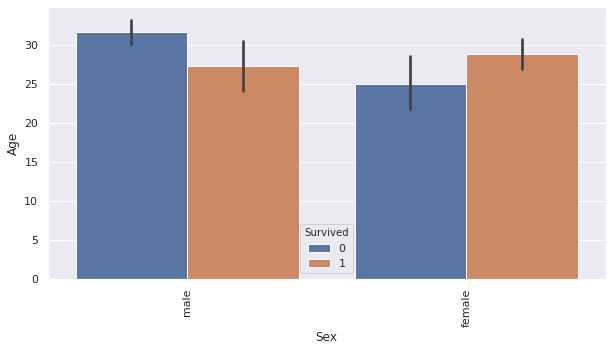

In [36]:
plt.figure(figsize=(10, 5))
n= sns.barplot(x="Sex", y='Age',hue = 'Survived', data = train_df)
n.set_xticklabels(n.get_xticklabels(), rotation=90)
plt.show()

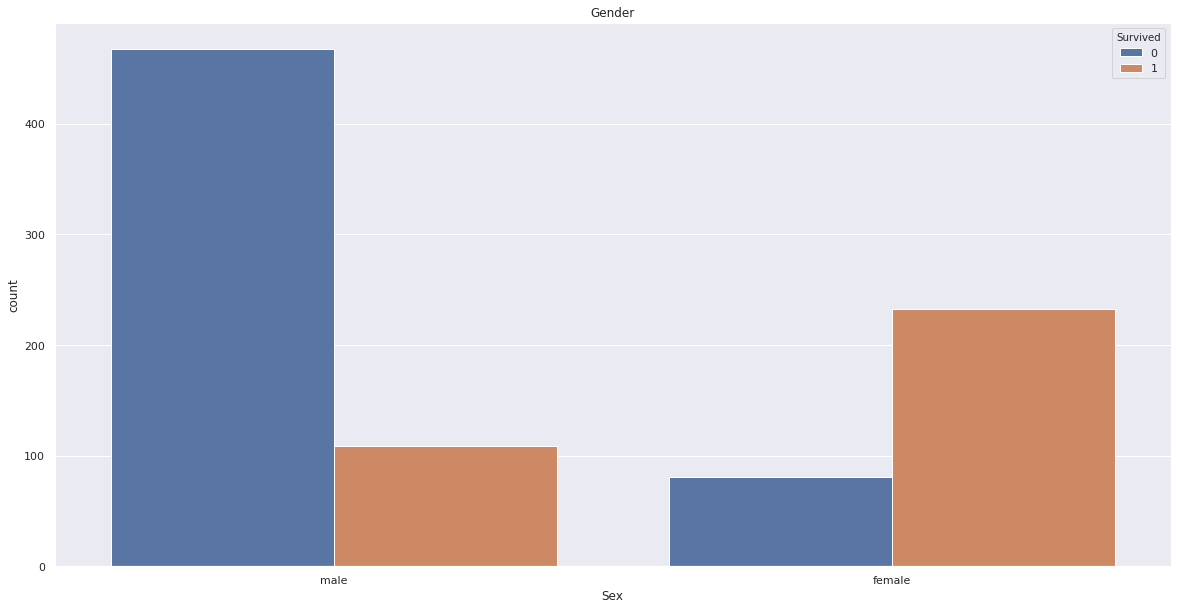

In [37]:
plt.figure(figsize=(20, 10))
plt.title('Gender')
sns.set(style="darkgrid")
sns.countplot(x = 'Sex', hue='Survived', data = train_df)
plt.show()

* It is evident that more percentage female who survived is more than male. Could it be chivalry?

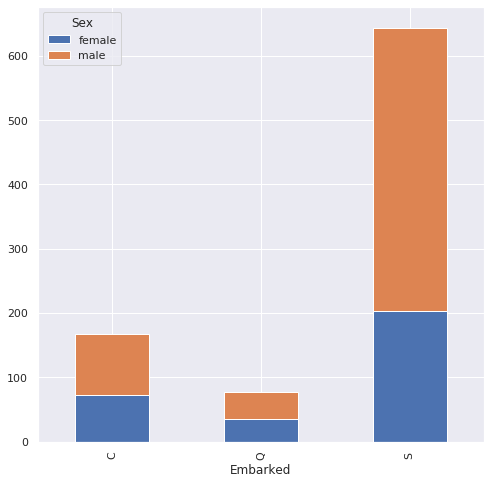

In [38]:
Sex  = pd.crosstab(index=train_df['Embarked'], 
                          columns=train_df["Sex"])
Sex.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
plt.show()

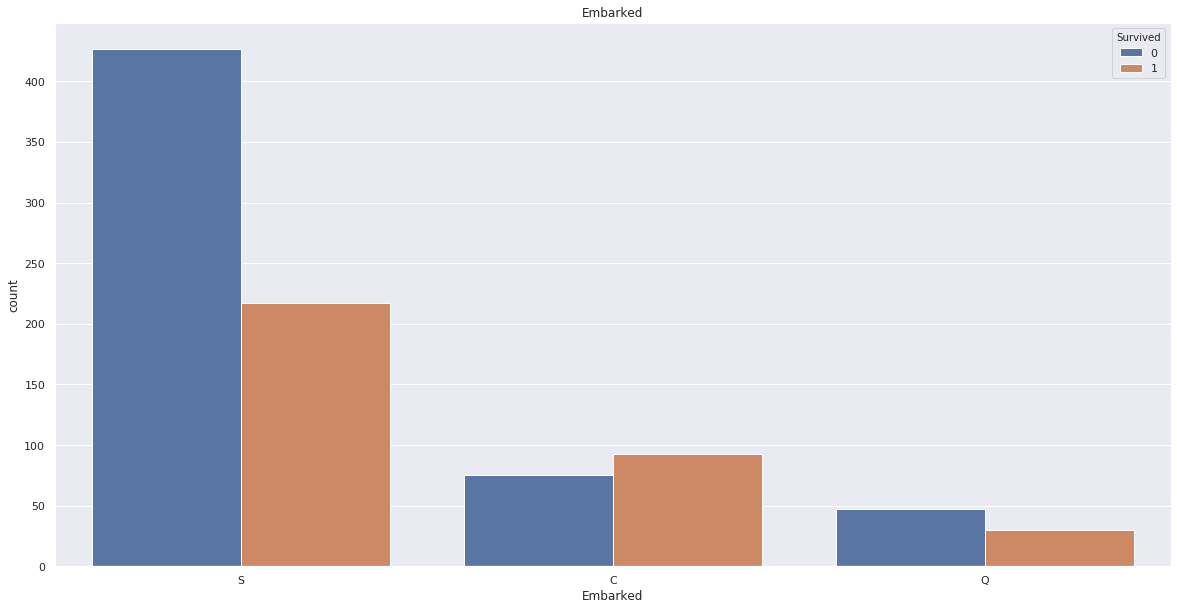

In [39]:
plt.figure(figsize=(20, 10))
plt.title('Embarked')
sns.set(style="darkgrid")
sns.countplot(x = 'Embarked', hue='Survived', data = train_df)
plt.show()

* Cherbourg : More male Embarked but higher percentage of those who survied from those that embarked are female

#### Feature Engineering

* Treatment of Missing Values

In [40]:
train_df['Embarked'].fillna(method='ffill',inplace = True)
test_df['Fare'].fillna(method='ffill',inplace = True)

In [41]:
mean_age = train_df.groupby('Pclass')['Age'].mean()
mean_age

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

* I will be filling the Ages by the mean of the class,if Age is null, i fill the age with the mean age the particular class the person belongs to.

In [42]:
train_df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

* I will convert the age to integers first by rounding up.I am assuming the age is in years


In [43]:
train_df['Age'] = train_df['Age'].apply(np.ceil)
test_df['Age'] = test_df['Age'].apply(np.ceil)
train_df.Age.unique()

array([22., 38., 26., 35., nan, 54.,  2., 27., 14.,  4., 58., 20., 39.,
       55., 31., 34., 15., 28.,  8., 19., 40., 66., 42., 21., 18.,  3.,
        7., 49., 29., 65.,  5., 11., 45., 17., 32., 16., 25.,  1., 30.,
       33., 23., 24., 46., 59., 71., 37., 47., 12.,  9., 51., 56., 41.,
       44., 61., 50., 36., 62., 52., 63., 43., 60., 10., 64., 13., 48.,
       53., 57., 80., 70.,  6., 74.])

* I will fill the age with the mean (rounded up) of the class the passenger

In [44]:
for i in range(3):
    train_df.loc[train_df['Pclass']==int(i+1), 'Age'] = train_df.loc[train_df['Pclass']==int(i+1), 'Age'].fillna(mean_age.values[i].round())
    test_df.loc[test_df['Pclass']==int(i+1), 'Age'] = test_df.loc[test_df['Pclass']==int(i+1), 'Age'].fillna(mean_age.values[i].round())

In [45]:
train_df['Age'].isnull().values.any() 

False

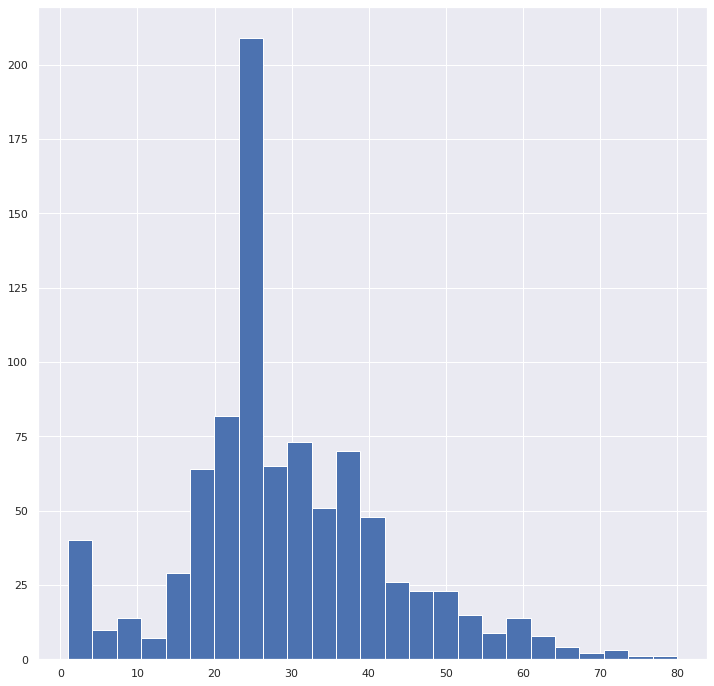

In [46]:
train_df['Age'].hist(figsize=(12,12), bins=25)
plt.show()

* I will fill null values of Cabin_group  with N an new cabin group for Not Available. 

In [47]:
train_df['Cabin_group'].fillna('N',inplace = True)
test_df['Cabin_group'].fillna('N',inplace = True)

In [48]:
train_df.groupby('Cabin_group').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin_group,,,,,,,
A,439.600000,0.466667,1.000000,43.466667,0.133333,0.133333,39.623887
B,521.808511,0.744681,1.000000,35.085106,0.361702,0.574468,113.505764
C,406.440678,0.593220,1.000000,36.355932,0.644068,0.474576,100.151341
D,475.939394,0.757576,1.121212,38.969697,0.424242,0.303030,57.244576
E,502.437500,0.750000,1.312500,37.875000,0.312500,0.312500,46.026694
F,370.384615,0.615385,2.384615,20.769231,0.538462,0.538462,18.696792
G,216.000000,0.500000,3.000000,14.750000,0.500000,1.250000,13.581250
N,443.208151,0.299854,2.639010,27.318777,0.547307,0.365357,19.157325
T,340.000000,0.000000,1.000000,45.000000,0.000000,0.000000,35.500000


* Creating of New Feature

1. From the Features SibSp and Parch,it is obvious that some passengers are travelling with family, Some alone,i want to create a new feature of those travelling alone.It is binary Yes:1, No:0.
    * Where SibSp is 0 and Parch is 0 that means the passenger is travelling alone that is 1
    * Where SibSp or Parch is greater than 1 IsAlone is 0

In [49]:
train_df['IsAlone']=(train_df["SibSp"]+train_df["Parch"]).apply(lambda x: 0 if x>0 else 1)
test_df['IsAlone']=(test_df["SibSp"]+test_df["Parch"]).apply(lambda x: 0 if x>0 else 1)

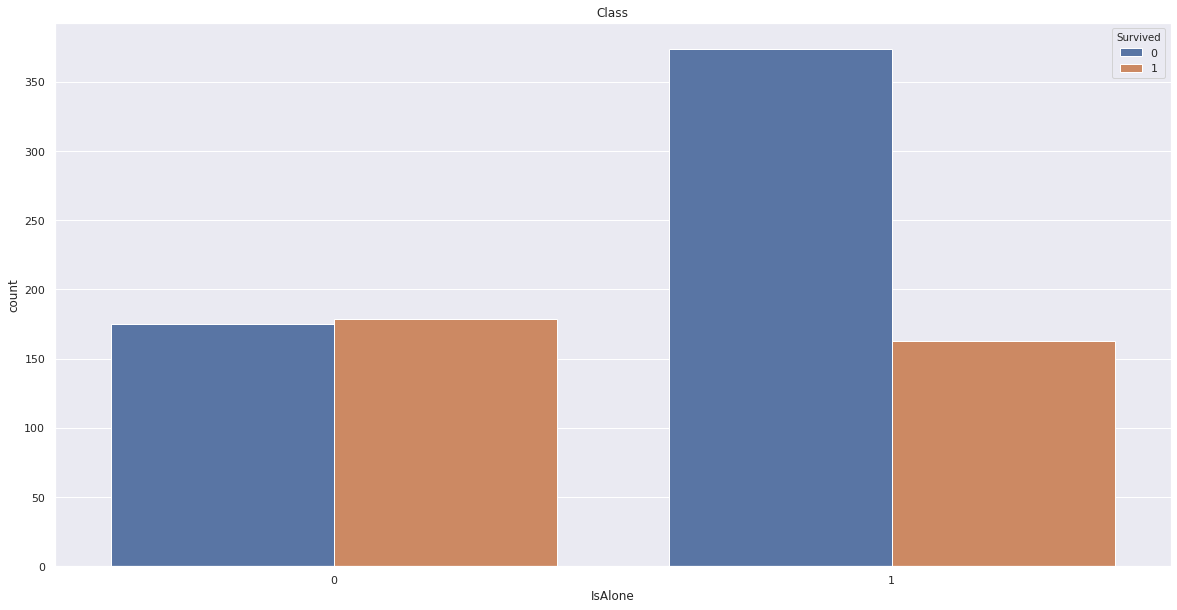

In [50]:
plt.figure(figsize=(20, 10))
plt.title('Class')
sns.set(style="darkgrid")
sns.countplot(x = 'IsAlone', hue='Survived', data = train_df)
plt.show()

2.From the Above features it is also possible to get the family size of those travelling.I am going to start by calculating the number of people in the Family, i combined the featurees and added one(the passenger travelling)

In [51]:
train_df['Family_member']=train_df["SibSp"]+train_df["Parch"]+1
test_df['Family_member']=test_df["SibSp"]+test_df["Parch"]+1
train_df.groupby('Family_member')['Family_member'].count()

Family_member
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: Family_member, dtype: int64

* We have 537 people travelling alone and about seven family of eleven.To make it easier i would the family according to their sizes 


In [52]:
train_df.loc[train_df['Family_member']==1, 'FamilySize'] = 'Alone'
train_df.loc[train_df['Family_member']==2, 'FamilySize'] = 'Couple'
train_df.loc[train_df['Family_member']==3, 'FamilySize'] = 'Small'
train_df.loc[train_df['Family_member']==4, 'FamilySize'] = 'Small'
train_df.loc[train_df['Family_member']==5, 'FamilySize'] = 'Medium'
train_df.loc[train_df['Family_member']==6, 'FamilySize'] = 'Medium'
train_df.loc[train_df['Family_member']>6, 'FamilySize'] = 'Large'

In [53]:
test_df.loc[test_df['Family_member']==1, 'FamilySize'] = 'Alone'
test_df.loc[test_df['Family_member']==2, 'FamilySize'] = 'Couple'
test_df.loc[test_df['Family_member']==3, 'FamilySize'] = 'Small'
test_df.loc[test_df['Family_member']==4, 'FamilySize'] = 'Small'
test_df.loc[test_df['Family_member']==5, 'FamilySize'] = 'Medium'
test_df.loc[test_df['Family_member']==6, 'FamilySize'] = 'Medium'
test_df.loc[test_df['Family_member']>6, 'FamilySize'] = 'Large'

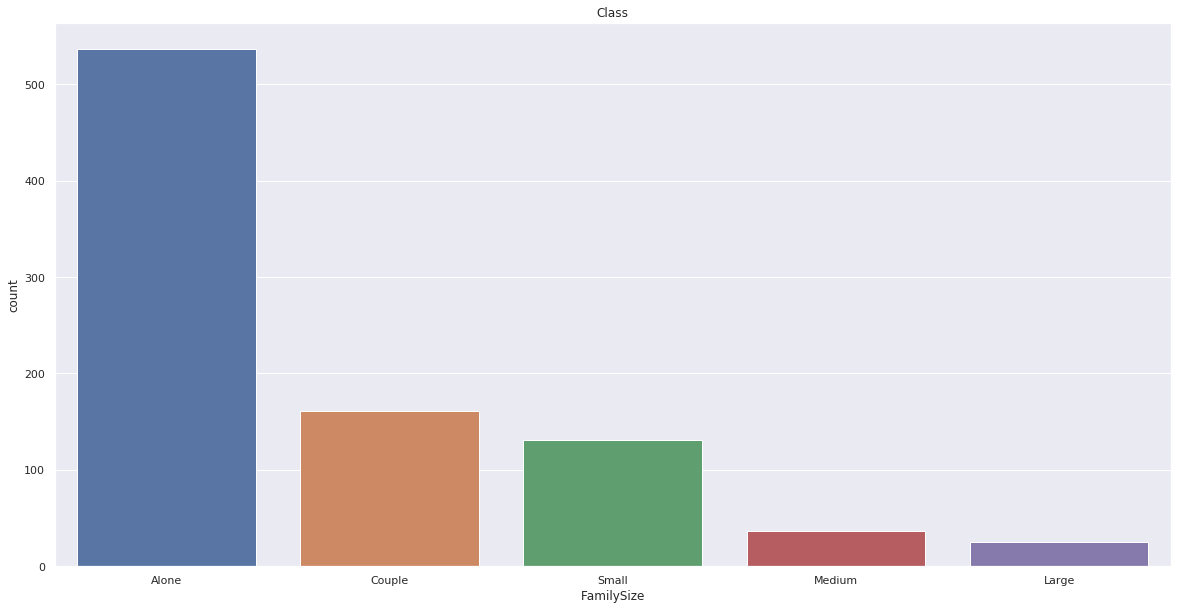

In [54]:
plt.figure(figsize=(20, 10))
plt.title('Class')
sns.set(style="darkgrid")
sns.countplot(x = 'FamilySize',order = train_df['FamilySize'].value_counts().index, data = train_df)
plt.show()

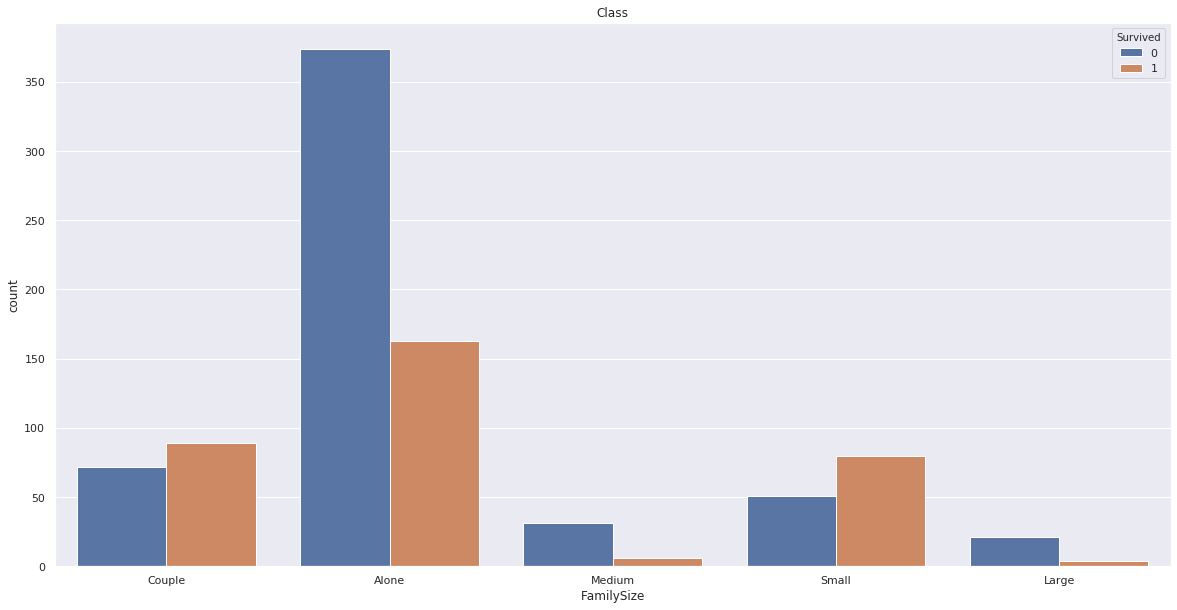

In [55]:
plt.figure(figsize=(20, 10))
plt.title('Class')
sns.set(style="darkgrid")
sns.countplot(x = 'FamilySize', hue='Survived', data = train_df)
plt.show()

* Those Travelling alone has the highest population but Small families and couples has an higher surviveal rate with couples as the highest

3. From the Feature Cabin.I will also assume the number in front of the alphabet is the room number.(Using the example of how airplanes number their seat).

In [56]:
train_df["Room_number"] = train_df["Cabin"].str.slice(1,4).str.extract("([0-9]+)", expand=False).astype("float")
test_df["Room_number"] = test_df["Cabin"].str.slice(1,4).str.extract("([0-9]+)", expand=False).astype("float")

* But Room_number will inherit the missing values from Cabin which is quite a lot, Filling it with the Mean just like Age,median or mode will reduce the variance in the data

In [57]:
train_df["Room_number"].fillna(method='ffill',inplace = True)
train_df["Room_number"].fillna(method='bfill',inplace = True)
test_df["Room_number"].fillna(method='ffill',inplace = True)
test_df["Room_number"].fillna(method='bfill',inplace = True)

In [58]:
# Room = train_df.groupby(['Embarked', 'Pclass']).median()['Room_number']
# Room
# train_df['Room_number'] = train_df.groupby(['Embarked', 'Pclass'])['Room_number'].apply(lambda x: x.fillna(x.median()))
# test_df['Room_number'] = test_df.groupby(['Embarked', 'Pclass'])['Room_number'].apply(lambda x: x.fillna(x.median()))

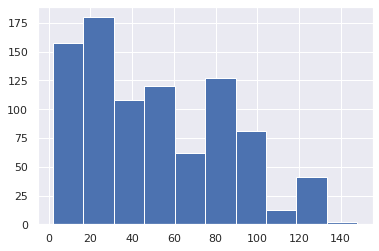

In [59]:
train_df["Room_number"].hist()
plt.show()

* This Method is not the best either but atleast it has better variation compared to filling up with mean

4. From the Name feature i would to extract Title feature The Title is place in between a coma (,) and full Stop Making it easy the extract

In [60]:
train_df['Title'] = train_df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
test_df['Title'] = test_df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
train_df['Title'].head(20)

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
5         Mr
6         Mr
7     Master
8        Mrs
9        Mrs
10      Miss
11      Miss
12        Mr
13        Mr
14      Miss
15       Mrs
16    Master
17        Mr
18       Mrs
19       Mrs
Name: Title, dtype: object

* Lets plot the frequency of the titles we have

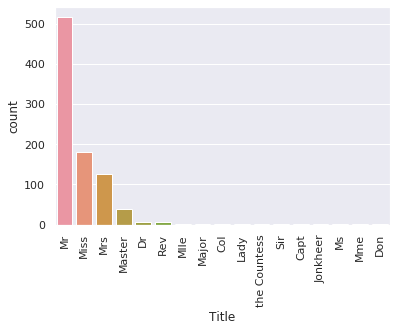

In [61]:
n =sns.countplot(train_df['Title'],order = train_df['Title'].value_counts().index)
n.set_xticklabels(n.get_xticklabels(), rotation=90)
fig.tight_layout() 
plt.show()

In [62]:
mapping = {'Major': 'Military', 'Col': 'Military','Mlle': 'Miss','Capt': 'Military', 'the Countess': 'Noble','Ms': 'Miss', 'Lady': 'Noble', 'Mme': 'Mrs',
          'Sir': 'Noble','Jonkheer': 'Noble','Don': 'Noble'}

In [63]:
train_df.replace({'Title': mapping}, inplace=True)
test_df.replace({'Title': mapping}, inplace=True)

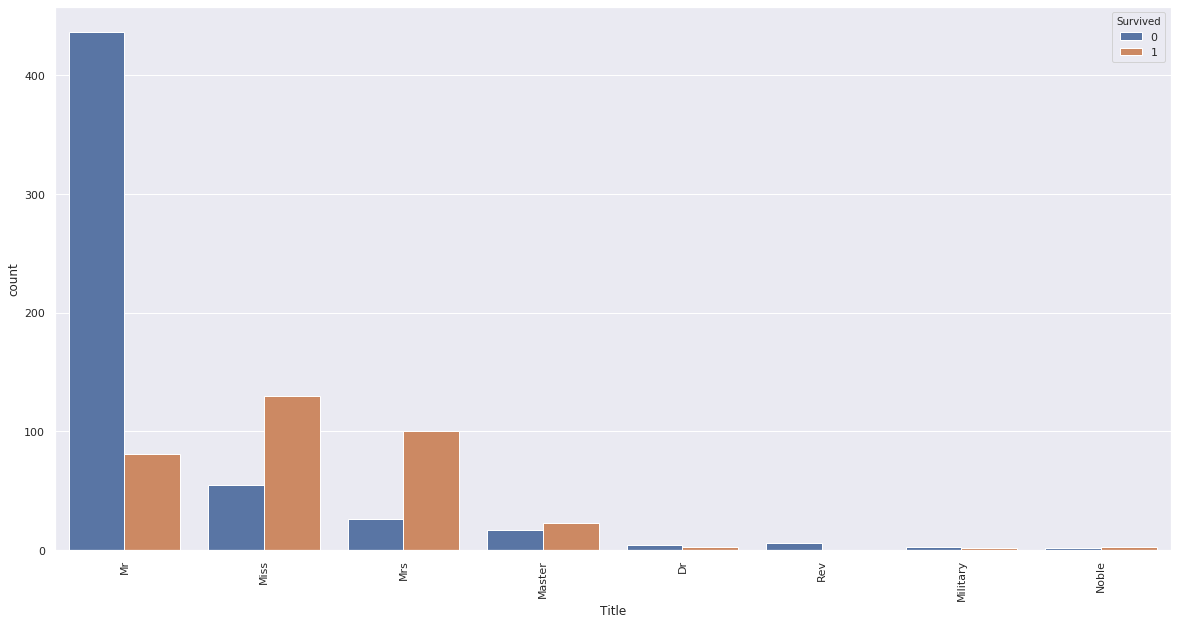

In [64]:
plt.figure(figsize=(20, 10))
n =sns.countplot(train_df['Title'],order = train_df['Title'].value_counts().index, hue=train_df['Survived'])
n.set_xticklabels(n.get_xticklabels(), rotation=90)
fig.tight_layout() 
plt.show()

* Miss has the highest Survival rate

5. I will group the ticket andd see what i derive from it.
    * Some appear once some more more than once the frequency show repeated tickets

In [65]:
train_df['Ticket_Frequency'] = train_df.groupby('Ticket')['Ticket'].transform('count')
test_df['Ticket_Frequency'] = test_df.groupby('Ticket')['Ticket'].transform('count')

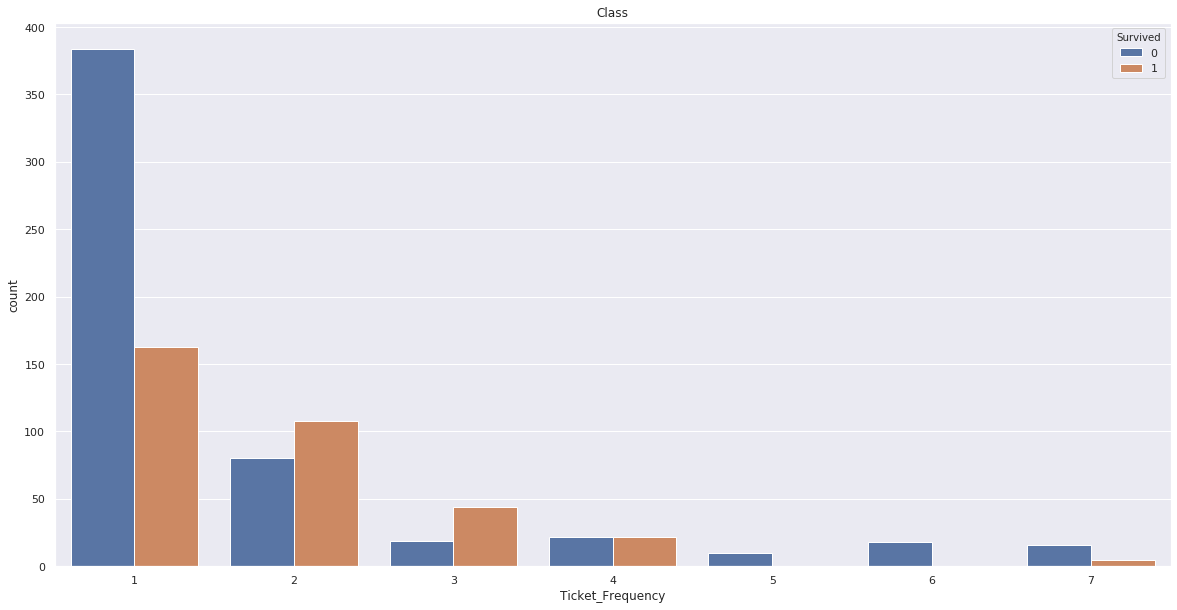

In [66]:
plt.figure(figsize=(20, 10))
plt.title('Class')
sns.set(style="darkgrid")
sns.countplot(x = 'Ticket_Frequency', hue='Survived', data = train_df)
plt.show()

5. 

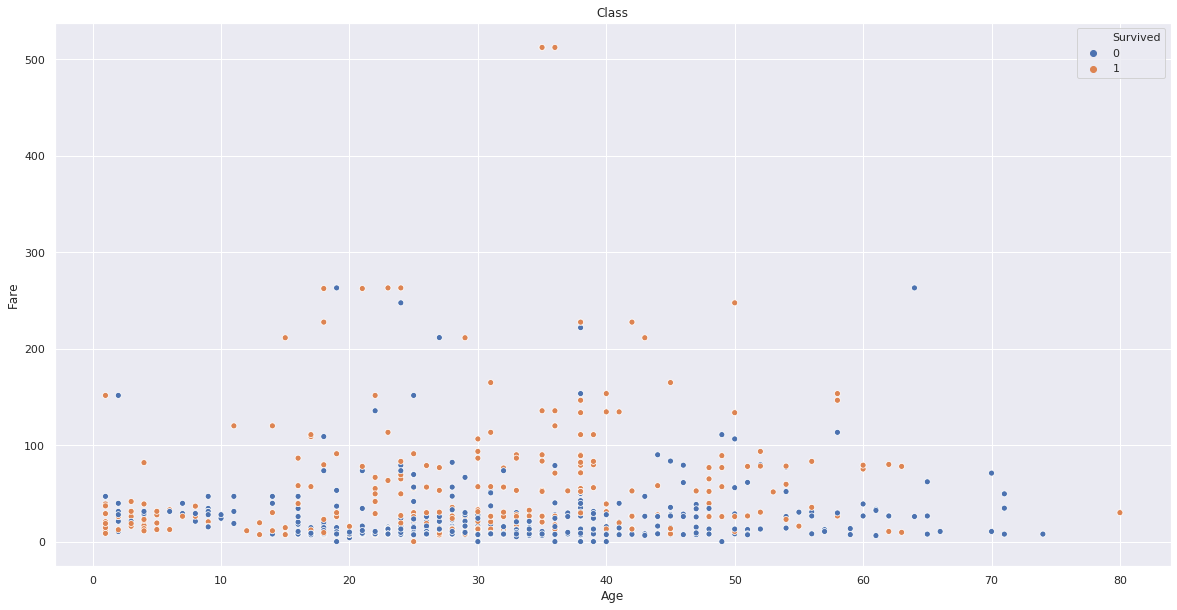

In [67]:
plt.figure(figsize=(20, 10))
plt.title('Class')
sns.set(style="darkgrid")
sns.scatterplot(x = 'Age',y='Fare', hue='Survived', data = train_df)
plt.show()

* There is no linear relation between the two features however the oldest passenger survived and those with the most expensive ticket also survived, so i am going put the ages into age group and then see which age group has the highest survival rate and also bought the most expensive tickets

In [68]:
# bins= [0,18,26,50,80]
# labels = ['Children','Young_Adult','Adult','Seniors']
# train_df['Age_group'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False).astype('str')
# test_df['Age_group'] = pd.cut(test_df['Age'],bins=bins, labels=labels, right=False).astype('str')


In [69]:
# plt.figure(figsize=(20, 10))
# plt.title('Class')
# sns.set(style="darkgrid")
# sns.countplot(x = 'Age_group', hue='Survived', data = train_df)
# plt.show()

* Children as the highest survival rate

In [70]:
# plt.figure(figsize=(10, 5))
# n= sns.barplot(x='Age_group', y='Fare',data = train_df)
# n.set_xticklabels(n.get_xticklabels(), rotation=90)
# plt.show()Titanic: Machine Learning from Disaster

### Drop Some Features before modelling
1. Passenger Id: Identifier
2. Cabin : New features have been created 
3. Survived:Target feature
4. Name

In [71]:
columns = ['PassengerId','Cabin','Survived','Name','Ticket','Family_member']
test = ['PassengerId','Cabin','Name','Ticket','Family_member']
new_train = train_df.copy().drop(columns = columns)
new_test = test_df.copy().drop(columns = test)
y_train = train_df['Survived']

6.

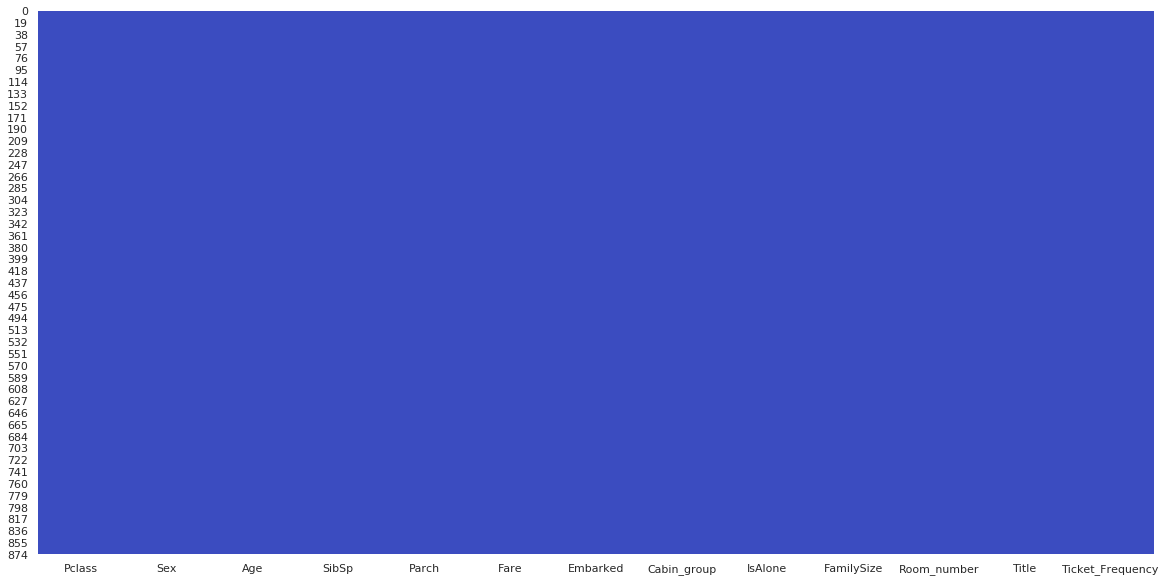

In [72]:
plt.figure(figsize=(20, 10))
sns.heatmap(new_train.isnull(), cbar=False, cmap="coolwarm") #
plt.show()

* No null data 

#### Encoding of Data 
Since the models do not understand Strings, i will be encoding the object data to numeric

In [73]:
new_train.dtypes

Pclass                int64
Sex                  object
Age                 float64
SibSp                 int64
Parch                 int64
Fare                float64
Embarked             object
Cabin_group          object
IsAlone               int64
FamilySize           object
Room_number         float64
Title                object
Ticket_Frequency      int64
dtype: object

The features to be encoded includes:
1. Sex
2. Embarked 
3. Cabin_group
4. Ticket_Frequency

In [74]:
from sklearn.preprocessing import LabelEncoder
def ord_encode(column):
    le =LabelEncoder()
    for i in column.columns:
        column[i] = le.fit_transform(column[i])
    return column
cols = ['Sex','Embarked','Cabin_group','Ticket_Frequency','Title','FamilySize']
new_train[cols] = ord_encode(new_train[cols])
new_test[cols] = ord_encode(new_test[cols])

#### Feature Scaling

In [75]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
train_features = sc_x.fit_transform(new_train) 
test_features = sc_x.transform(new_test) 

In [76]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range = (0,1))

# scaler.fit(new_train)
# train_features = scaler.transform(new_train)
# test_features = scaler.transform(new_test)

#### I will be trying out three algorithms
1. Logistic Regression
2. Random Forest 


In [77]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,confusion_matrix 
from sklearn.metrics import f1_score,accuracy_score,classification_report,roc_curve
from sklearn.model_selection import GridSearchCV

#### Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression() 


#### Create Hyperparameter Search Space

In [79]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

clf = GridSearchCV(classifier, hyperparameters, cv=5, verbose=0)

In [80]:
best_model = clf.fit(train_features, y_train) 

In [81]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 2.7825594022071245


In [82]:
best_model.score(train_features, y_train)

0.8181818181818182

In [83]:
y_pred = best_model.predict(train_features) 

In [84]:
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[479  70]
 [ 92 250]]


LR : 
1. Accuracy 80808:
Confusion Matrix : 
 [[482  67]
 [104 238]]
 Minmax
2. Accuracy 80920
    Confusion Matrix : 
 [[476  73]
 [ 97 245]]
 Standardscaler
3. Accuracy 81818
    [[479  70]
    [ 92 250]]

In [85]:
print ('Accuracy Score :',accuracy_score(y_train, y_pred) )
print ('Report : ')
print (classification_report(y_train, y_pred))

Accuracy Score : 0.8181818181818182
Report : 
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       549
           1       0.78      0.73      0.76       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.81       891
weighted avg       0.82      0.82      0.82       891



In [86]:
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
print(RMSE.round(4))

0.4264


In [87]:
model_pred1 =best_model.predict(test_features)

In [88]:
submission = pd.DataFrame({
        'PassengerId': test_df['PassengerId'],
        'Survived': np.int_(abs(model_pred1.round()))
    })

In [89]:
submission.to_csv('./submission.csv', index=False)

## Random Forest

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
rf = RandomForestRegressor(n_estimators=1100)
rf.fit(train_features, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [92]:
rf.score(train_features, y_train)

0.9241753157110362

In [93]:
y_pred2 = rf.predict(train_features)
y_pred2 = np.int_(abs(y_pred2.round()))

In [94]:
cm2 = confusion_matrix(y_train, y_pred2) 
print ("Confusion Matrix : \n", cm2) 

Confusion Matrix : 
 [[549   0]
 [  0 342]]


In [95]:
print ('Accuracy Score :',accuracy_score(y_train, y_pred2) )
print ('Report : ')
print (classification_report(y_train, y_pred2))

Accuracy Score : 1.0
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891



In [96]:
RMSE2 = np.sqrt(mean_squared_error(y_train, y_pred2))
print(RMSE2.round(4))

0.0


In [97]:
f1_score2 = f1_score(y_train, y_pred2.round(),average='weighted') 
f1_score2

1.0

In [98]:
model_pred = rf.predict(test_features)

In [99]:
submission2 = pd.DataFrame({
        'PassengerId': test_df['PassengerId'],
        'Survived': np.int_(abs(model_pred.round()))
    })

In [100]:
submission2.to_csv('./submission2.csv', index=False)

### Support Vector Machine

In [101]:
# from sklearn.svm import SVC
# svc = SVC(gamma='auto')
# clf.fit(X, y)
# SVC(gamma='auto')
# print(clf.predict([[-0.8, -1]]))